# Telecom Churn Prediction_Case Study

**Authors:**  Girish Satyam & Ambar Ashish

# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

### Steps To Be Followed here :-
1. Reading and Understanding Data
2. Data Pre-processing
    - Data Cleaning
    - Missing Value Treatment
    - Outlier Treatment
3. Data Visualization
4. Data Preparation
5. Model Selection
6. Model Building and Evaluation
7. Choose Best Model
8. Choosing Important Features
9. Business Recommendations

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


### Step 1: Reading and Understanding Data

In [2]:
#Read the Data
train_data = pd.read_csv("train.csv")
train_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [3]:
train_data.shape

(69999, 172)

In [4]:
train_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [5]:
#Understanding Data
train_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

- The Id column is dispensable and can be excluded from the dataset.
- The circle id field can also be discarded since it consistently holds the same value (109) across all records.
- The date column holds no essential relevance and can be removed. Given our goal of computing churn probability for future dates, the inclusion of date columns is deemed insignificant.
- The following columns exclusively contain zero values and can therefore be dropped:
  - loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8.
- Certain columns exhibit outliers and necessitate treatment, such as onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8.

In [6]:
train_data.shape

(69999, 172)

### Step 2: Missing Value Treatment

In [7]:
#Function to calculate missing value percentage in descending order
def calcmsngval(df):
    total = df.isnull().sum().sort_values(ascending=False)
    pct = (df.isnull().sum()/len(df)*100).sort_values(ascending = False)
    missing_null_pct = pd.concat([total, pct], axis=1, keys=['Total', 'Percent'])
    return missing_null_pct

In [8]:
#Calculate missing value %
missing_null_pct = calcmsngval(train_data)
missing_null_pct

,Total,Percent
arpu_3g_6,52431,74.902499
count_rech_2g_6,52431,74.902499
night_pck_user_6,52431,74.902499
arpu_2g_6,52431,74.902499
date_of_last_rech_data_6,52431,74.902499
total_rech_data_6,52431,74.902499
av_rech_amt_data_6,52431,74.902499
max_rech_data_6,52431,74.902499
count_rech_3g_6,52431,74.902499
fb_user_6,52431,74.902499


- Columns with a missing value percentage exceeding 70% can be eliminated.
- Columns associated with recharging can be filled with 0, assuming that customers have not recharged, leading to the unavailability of information.
- For columns related to revenue, if the missing data surpasses a certain threshold, it is inappropriate to impute values, as it may lead to misleading information. Consequently, it is preferable to drop such columns.

In [9]:
train_data.total_rech_data_6.astype("category")
train_data.total_rech_data_6.value_counts()

1.0     9289
2.0     3610
3.0     1457
4.0      928
5.0      560
6.0      413
7.0      310
8.0      248
9.0      174
10.0     145
11.0     114
12.0      96
14.0      47
13.0      42
15.0      24
17.0      21
16.0      21
18.0      11
20.0      11
22.0       9
19.0       7
23.0       4
24.0       4
21.0       4
25.0       4
32.0       2
40.0       2
29.0       2
35.0       2
46.0       1
28.0       1
27.0       1
26.0       1
33.0       1
61.0       1
34.0       1
Name: total_rech_data_6, dtype: int64

In [10]:

train_data.arpu_2g_6.astype("category")
train_data.arpu_2g_6.value_counts()

0.00      4610
212.17     904
122.07     377
0.01       291
63.96      283
          ... 
138.26       1
23.23        1
80.33        1
31.55        1
279.26       1
Name: arpu_2g_6, Length: 5389, dtype: int64

In [11]:
train_data.churn_probability.astype("category")
train_data.churn_probability.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [12]:

train_data.isd_og_mou_8.astype("category")
train_data.fb_user_8.value_counts()

1.0    16397
0.0     2020
Name: fb_user_8, dtype: int64

In [13]:

train_data.isd_og_mou_8.astype("category")
train_data.isd_og_mou_8.value_counts()

0.00     63384
0.01        75
0.03        65
1.01        51
0.06        45
         ...  
67.40        1
16.35        1
72.93        1
3.48         1
25.49        1
Name: isd_og_mou_8, Length: 1008, dtype: int64

In [14]:
train_data.night_pck_user_6.astype("category")
train_data.night_pck_user_6.value_counts()

0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64

In [15]:
train_data.fb_user_7.astype("category")
train_data.fb_user_7.value_counts()

1.0    16249
0.0     1616
Name: fb_user_7, dtype: int64

**Observation:**
- The following columns are associated with service schemes, having values of either 0 or 1. As interpreting a service scheme for missing values is not feasible, these columns can be categorized with a new value, -1.
  - night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7, fb_user_8.

#### Impute Missing Values

In [16]:
def datamanipulation(df):
    #dropping unnecessary columns
    df.drop(['id','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8'], axis=1, inplace=True)
    
    #Impute columns related to recharge with 0
    rech_cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
    'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6'
    ,'total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7',
    'max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
    'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']
    df[rech_cols] = df[rech_cols].apply(lambda x: x.fillna(0))
    
    # Impute columns related to service schemes with -1
    scheme_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7','fb_user_8']
    df[scheme_cols] = df[scheme_cols].apply(lambda x: x.fillna(-1))
    #dropping columns with more than 70% missing values
    df.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'], axis=1, inplace=True)
    
    # Define the imputer strategy (e.g., 'mean', 'median', or 'most_frequent')
    imputer_strategy = 'mean'

    # Create a SimpleImputer instance
    simple_imputer = SimpleImputer(strategy=imputer_strategy)

    # Fit and transform the DataFrame using the imputer
    df_imputed = simple_imputer.fit_transform(df)

    # Convert the imputed NumPy array to a pandas DataFrame with original columns
    df = pd.DataFrame(df_imputed, columns=df.columns)
    
    return df

In [17]:
#Calculate missing value %
missing_null_pct = calcmsngval(train_data)
missing_null_pct

,Total,Percent
arpu_3g_6,52431,74.902499
count_rech_2g_6,52431,74.902499
night_pck_user_6,52431,74.902499
arpu_2g_6,52431,74.902499
date_of_last_rech_data_6,52431,74.902499
total_rech_data_6,52431,74.902499
av_rech_amt_data_6,52431,74.902499
max_rech_data_6,52431,74.902499
count_rech_3g_6,52431,74.902499
fb_user_6,52431,74.902499


In [18]:
train_data.shape

(69999, 172)

In [19]:
train_data_manipulated = datamanipulation(train_data)

In [20]:
train_data_manipulated.shape

(69999, 149)

In [21]:
train_data_manipulated.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1958.0,0.0,0.0,0.0,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,710.0,0.0,0.0,0.0,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0

In [22]:
#Calculate missing value %
missing_null_pct = calcmsngval(train_data_manipulated)
missing_null_pct

,Total,Percent
arpu_6,0,0.0
total_rech_num_7,0,0.0
total_rech_amt_6,0,0.0
total_rech_amt_7,0,0.0
total_rech_amt_8,0,0.0
max_rech_amt_6,0,0.0
max_rech_amt_7,0,0.0
max_rech_amt_8,0,0.0
last_day_rch_amt_6,0,0.0
last_day_rch_amt_7,0,0.0


There are currently no null values. All missing values have been appropriately addressed.

### High Value Customer Analysis

In [23]:
train_copy = train_data_manipulated.copy()
train_copy

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1958.0,0.00,0.00,0.00,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.00,352.91,0.00,0.00,3.96,0.00,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,710.0,0.00,0.00,0.00,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.0

In [24]:
# calculate the total data recharge amount: number of recharges * average recharge amount
train_copy['total_data_rech_6'] = train_copy.total_rech_data_6 * train_copy.av_rech_amt_data_6
train_copy['total_data_rech_7'] = train_copy.total_rech_data_7 * train_copy.av_rech_amt_data_7

In [25]:
# calculate total recharge amount: call recharge amount + data recharge amount
train_copy['amt_data_6'] = train_copy.total_rech_amt_6 + train_copy.total_data_rech_6
train_copy['amt_data_7'] = train_copy.total_rech_amt_7 + train_copy.total_data_rech_7

In [26]:
# calculate average recharge done by customer
train_copy['av_amt_data_6_7'] = (train_copy.amt_data_6 + train_copy.amt_data_7)/2


In [27]:
train_copy['av_amt_data_6_7'].describe()

count    69999.000000
mean       485.760093
std        861.075228
min          0.000000
25%        128.000000
50%        275.500000
75%        553.000000
max      37762.500000
Name: av_amt_data_6_7, dtype: float64

In [28]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(train_copy.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [29]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
train_copy = train_copy.loc[train_copy.av_amt_data_6_7 >= train_copy.av_amt_data_6_7.quantile(0.7), :]
train_copy = train_copy.reset_index(drop=True)
train_copy.shape

(21013, 154)

**Observation:**

- It is evident that there are 21,013 records with significantly high recharge values. Targeting these customers for retention efforts is crucial, especially if there is a probability of them churning.

### Step 3: Data Visualization

#### Check target variable churn probability

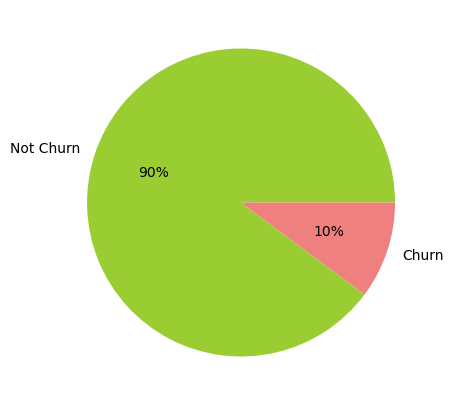

In [30]:
#plot churn_probability
plt.figure(figsize= (5,5)) 
data = train_data.churn_probability.value_counts()
labels = ['Not Churn','Churn']
colors = ['yellowgreen', 'lightcoral']
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%')

plt.show()

- There is a notable disparity between the number of churn cases and non-churn cases, indicating a class imbalance issue. It is imperative to address this concern during the modeling phase to ensure optimal results.

#### Checking the distribution of the tenure variable

In [31]:
train_data_manipulated['tenure'] = (train_data_manipulated['aon']/30).round(0)

In [32]:
train_data_manipulated['tenure'] = round((train_data_manipulated['aon']/30),0)

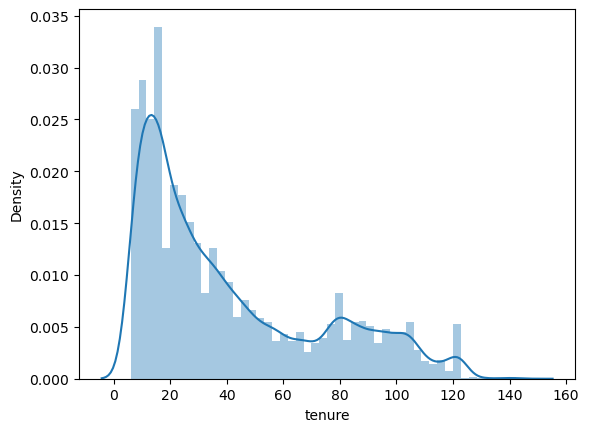

In [33]:
sns.distplot(train_data_manipulated['tenure'],bins=50)
plt.show()

### Univariate Analysis (based on AON variable)

In [34]:
ten_range = [0, 6, 12, 24, 60, 61]
ten_label = ['0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
train_data_manipulated['tenure_range'] = pd.cut(train_data_manipulated['tenure'], ten_range, labels=ten_label)
train_data_manipulated['tenure_range'].head()

0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

#### Plotting a bar graph for tenure

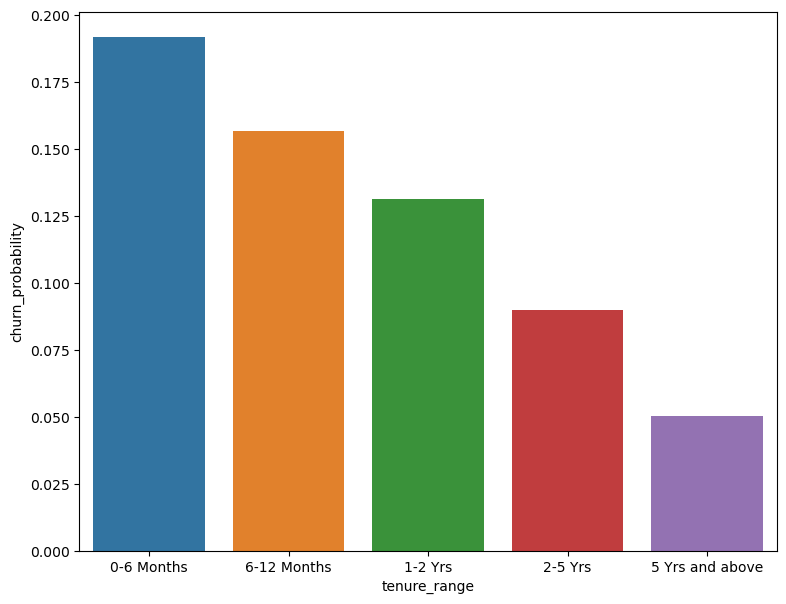

In [35]:
plt.figure(figsize=[9,7])
sns.barplot(x='tenure_range', y='churn_probability', data=train_data_manipulated, ci=None)
plt.show()

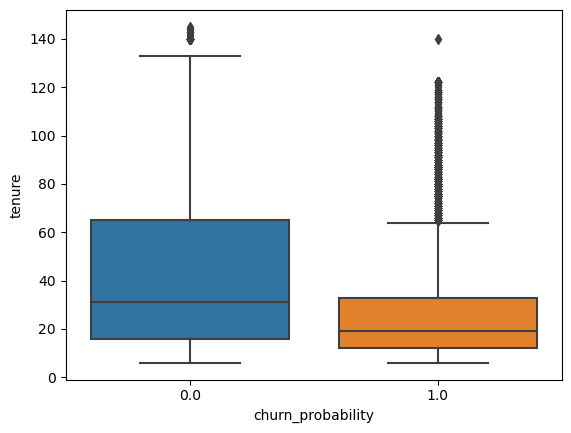

In [36]:
sns.boxplot(x = train_data_manipulated.churn_probability, y = train_data_manipulated.tenure)
plt.show()

**Observation:**
- The graph illustrates that the highest incidence of churn occurs within the initial 6 months, gradually diminishing as the tenure increases. Long-term customers exhibit minimal tendencies to leave the network.

### Univariate Analysis (Based on ARPU, recharge amount)

In [37]:
from tabulate import tabulate
def num_var_anal(col_names, scale='linear'):
    fig = plt.figure(figsize = (20,12))
    axis1=fig.add_subplot(1,3,1)
    sns.violinplot(x='churn_probability',y=col_names[0], data=train_data_manipulated, ax=axis1)
    if scale=='log':
        ply.yscale('log')
        axis1.set(ylabel = col_names[0])
    
    axis2=fig.add_subplot(1,3,2)
    sns.violinplot(x='churn_probability',y=col_names[1], data=train_data_manipulated, ax=axis2)
    if scale=='log':
        ply.yscale('log')
        axis2.set(ylabel = col_names[1])
    
    axis3=fig.add_subplot(1,3,3)
    sns.violinplot(x='churn_probability',y=col_names[2], data=train_data_manipulated, ax=axis3)
    if scale=='log':
        ply.yscale('log')
        axis3.set(ylabel = col_names[2])

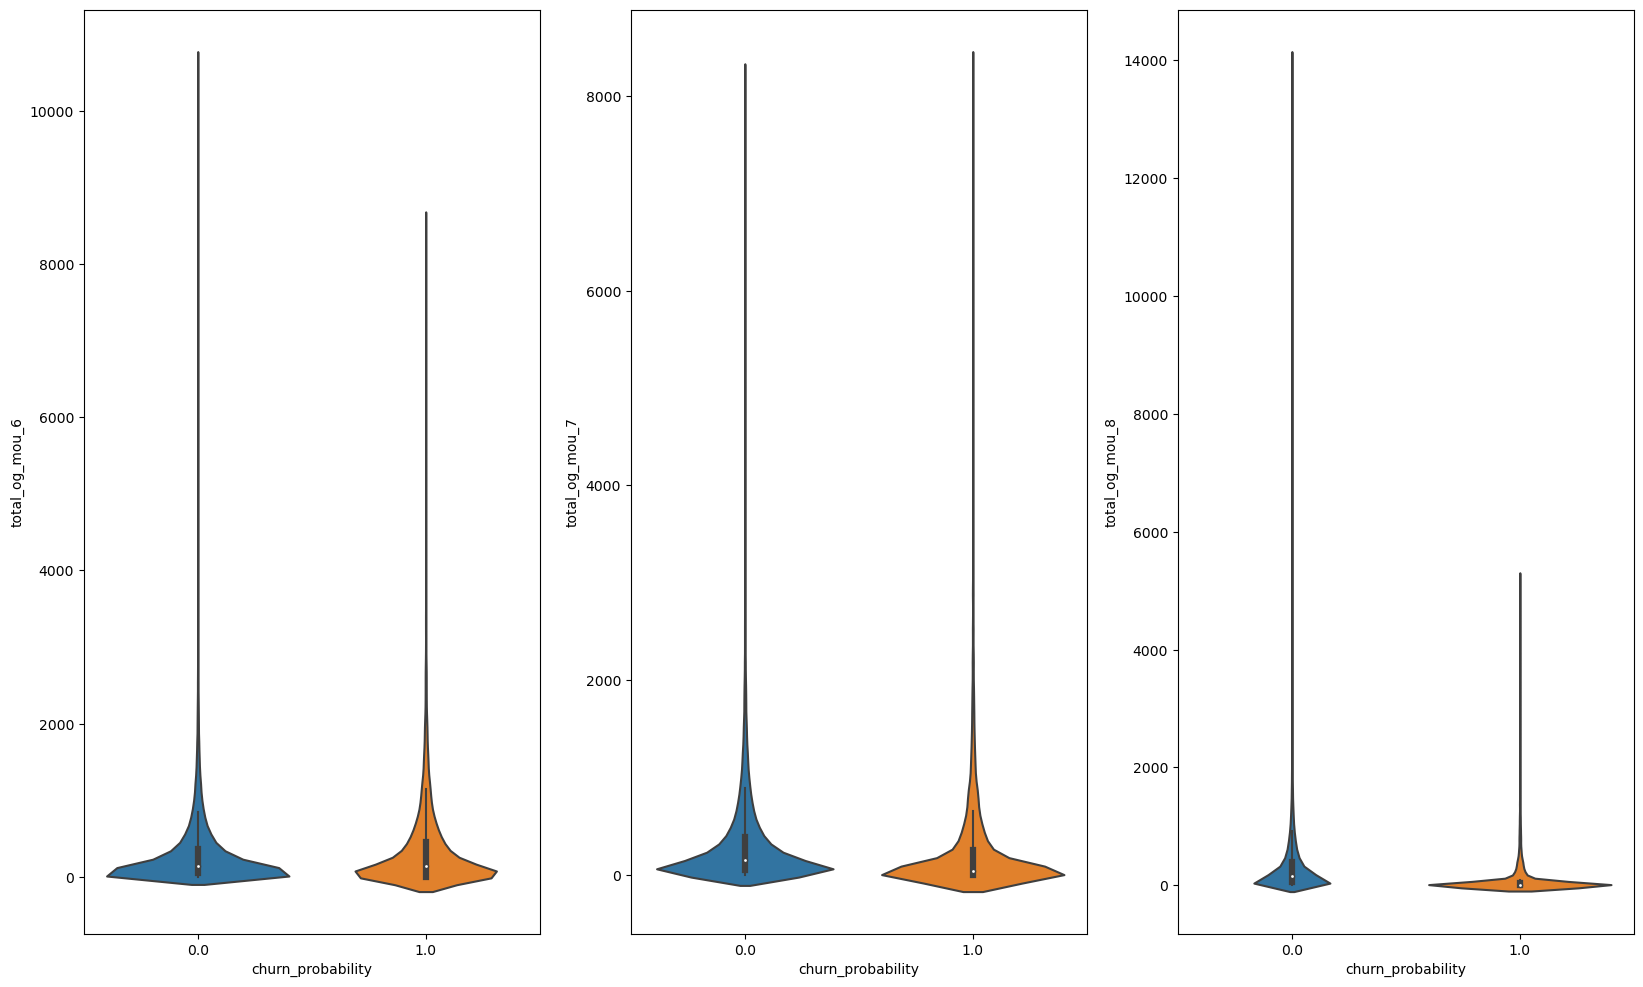

In [38]:
col_names = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_var_anal(col_names)

**Observation**
- Customers with higher outgoing calls in the 6'th month and lower calls in the 8'th month hava a high chance of churning

#### ARPU for 6'th, 7'th and 8'th month

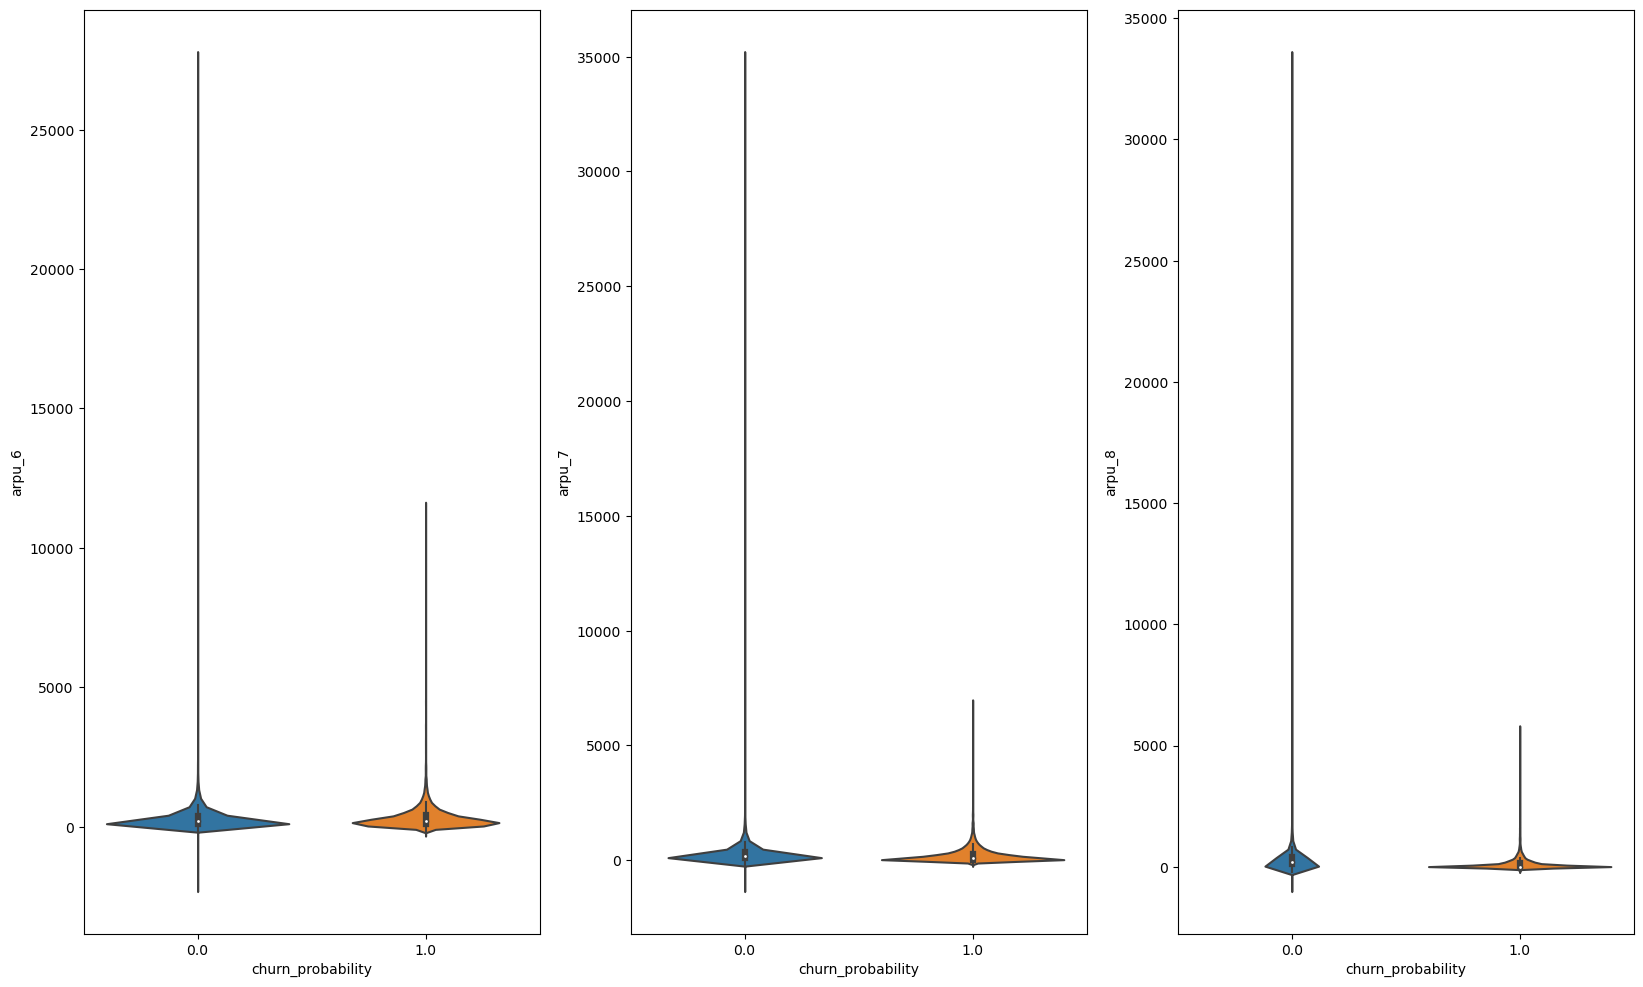

In [39]:
col_names = ['arpu_6','arpu_7','arpu_8']
num_var_anal(col_names)

**Observation**
- Here we can see that as the usage of the customer of arpu decreases, it is more likely that he will churn

<Axes: >

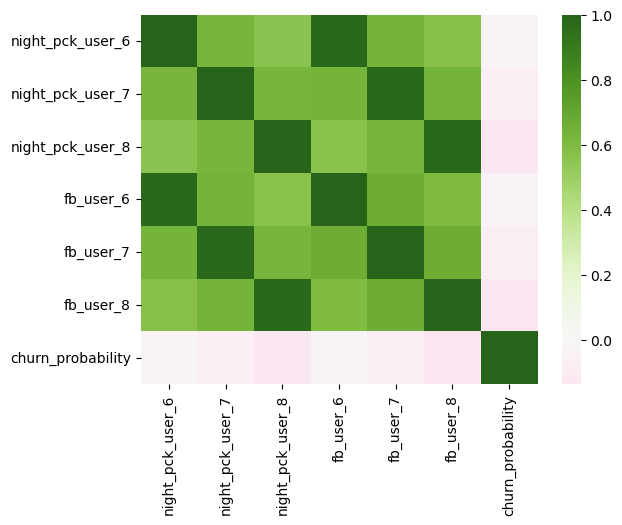

In [40]:
cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7','fb_user_8', 'churn_probability']
sns.heatmap(data=train_data[cols].corr(), center=0.0, cmap='PiYG')

**Observation**
- There is no correlation between scheme related features with churn. Hence these variables may not be significant in predicting churn.

In [41]:
#drop newly created columns tenure and tenure range as these were only used for analysis purpose
train_data_manipulated.drop(['tenure','tenure_range'],axis=1, inplace=True)

## Outlier treatment

In [42]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
train_data_manipulated.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,699

In [43]:
#Looking at outliers from 0.9 to 1.0
train_data_manipulated.describe(percentiles=[.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1.0])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,699

#### After looking at the above values we can cap the values of the outliers at 99% values

In [44]:
# Columns with outliers 
out99 = train_data_manipulated.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
out99_cond = out99 > 100
out_cols = out99[out99_cond].index.values
print('Columns with outliers :\n', out_cols)

Columns with outliers :
 ['arpu_6' 'arpu_7' 'arpu_8' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'roam_ic_mou_6'
 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7'
 'roam_og_mou_8' 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8'
 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6'
 'loc_og_mou_7' 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7'
 'std_og_t2t_mou_8' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2f_mou_6' 'std_og_t2f_mou_7'
 'std_og_t2f_mou_8' 'std_og_mou_6' 'std_og_mou_7' 'std_og_mou_8'
 'isd_og_mou_6' 'isd_og_mou_7' 'isd_og_mou_8' 'spl_og_mou_6'
 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6' 'og_others_7' 'og_others_8'
 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'
 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6'
 '

In [45]:
# Fixing the outliers to 99th percentile values
out_treat = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in out_cols : 
    out_threshold = train_data_manipulated[col].quantile(0.99)
    condition = train_data_manipulated[col] > out_threshold
    out_treat = out_treat.append({'Column' : col , 'Outlier Threshold' : out_threshold, 'Outliers replaced' : train_data_manipulated.loc[condition,col].shape[0] }, ignore_index=True)
    train_data_manipulated.loc[condition, col] = out_threshold
out_treat


,Column,Outlier Threshold,Outliers replaced
0,arpu_6,1400.276640,700
1,arpu_7,1414.891380,700
2,arpu_8,1445.054800,700
3,onnet_mou_6,1429.040400,700
4,onnet_mou_7,1461.342200,700
5,onnet_mou_8,1448.891000,700
6,offnet_mou_6,1520.310000,699
7,offnet_mou_7,1517.838600,700
8,offnet_mou_8,1492.232400,700
9,roam_ic_mou_6,213.827400,700


In [46]:
train_data_manipulated.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,699

All outliers have been treated properly.

### Step 4: Data Preparation

#### Prepare X_train and y_train

In [47]:
y_train=train_data_manipulated.pop("churn_probability")
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: churn_probability, dtype: float64

In [48]:
X_train=train_data_manipulated
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.0000,0.00,0.0000,0.00,0.00,0.0000,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.000,0.0000,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1958.0,0.00,0.000,0.00
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0000,0.00,22.01,23.5908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.350,1.6600,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.00,352.91,0.00,0.00,3.96,0.00,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,710.0,0.00,0.000,0.00
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.0000,0.00,0.0000,2.14,0.00,0.0000,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.000,0.0000,0.00,94.38,31.34,30.01,11.69,

#### Feature Scaling

In [49]:
#Rescaling the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


In [50]:
X_train

array([[0.62585269, 0.50902934, 0.39874099, ..., 0.        , 0.        ,
        0.        ],
       [0.61730469, 0.52225788, 0.41355824, ..., 0.        , 0.        ,
        0.        ],
       [0.63392296, 0.51500692, 0.39559275, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.71899626, 0.57238976, 0.51261411, ..., 0.        , 0.        ,
        0.        ],
       [0.68250719, 0.56759794, 0.45626625, ..., 0.54151118, 1.        ,
        0.83396184],
       [0.66329257, 0.49268907, 0.46584396, ..., 0.        , 0.        ,
        0.        ]])

### Test Dataset Preparation

In [51]:
#Read Data
testdata = pd.read_csv("test.csv")
testdata.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [52]:
testdata.shape

(30000, 171)

In [53]:
#Extract id as this will be required for output file
X_test_id = testdata.id

In [54]:
X_test_id

0        69999
1        70000
2        70001
3        70002
4        70003
         ...  
29995    99994
29996    99995
29997    99996
29998    99997
29999    99998
Name: id, Length: 30000, dtype: int64

In [55]:
#Data manipulation on test dataset

testdata_manipulated = datamanipulation(testdata)

In [56]:
#Feature scaling on test dataset
X_test = scaler.transform(testdata_manipulated)
X_test = pd.DataFrame(X_test)

In [57]:
X_test.shape

(30000, 148)

In [58]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147
0,0.642416,0.501014,0.422547,0.022239,0.013843,0.015950,0.039571,0.021188,0.023341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046499,0.039040,0.041564,0.024706,0.015244,0.011669,0.000000,0.248536,0.000000,0.0,0.000000,0.001272,0.037938,0.040161,0.027012,0.005693,0.000000,0.001642,0.034189,0.006133,0.021766,0.0,0.0,0.0,0.026354,0.004060,0.015129,0.0,0.0,0.000000,0.000000,0.000000,0.000509,0.000000,0.0,0.0,0.041125,0.023022,0.025833,0.063499,0.079722,0.048665,0.013636,0.006194,0.012740,0.001607,0.000000,0.000000,0.035921,0.036781,0.028103,0.000000,0.000000,0.000000,0.001360,0.003793,0.015853,0.0,0.0,0.00000,0.0,0.0,0.0,0.000924,0.002525,0.010913,0.030548,0.031518,0.026794,0.84375,0.539683,0.573529,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.142857,0.142857,0.114286,0.061200,0.052570,0.035170,0.090909,0.054545,0.054545,0.075,0.075377,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363724,0.000000,0.000000,0.000000
1,0.730497,0.667485,0.546529,0.052840,0.028200,0.013693,0.312002,0.409688,0.264664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141122,0.079526,0.039157,0.645395,0.837197,0.526571,0.013673,0.000000,0.000000,0.0,0.000000,0.000000,0.485017,0.574247,0.364485,0.000000,0.000000,0.000000,0.000000,0.018973,0.014560,0.0,0.0,0.0,0.000000,0.012559,0.009392,0.0,0.0,0.127787,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.245955,0.291377,0.185295,0.041851,0.057202,0.005779,0.213946,0.165016,0.247051,0.009208,0.000000,0.000000,0.159922,0.130200,0.167167,0.000000,0.000000,0.000000,0.000000,0.045627,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.030373,0.000000,0.216928,0.245747,0.208129,0.00000,0.000000,0.000000,0.720397,1.055087,0.556775,0.0,0.0,0.000000,0.142857,0.114286,0.142857,0.297085,0.292056,0.293080,0.454545,0.454545,0.454545,0.625,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566033,0.000000,0.000000,0.000000
2,0.707451,0.637652,0.707714,0.005276,0.005379,0.005798,0.011169,0.030181,0.030183,0.106675,0.693685,0.173599,0.086154,0.247839,0.263827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.171429,0.257143,0.142857,0.297085,0.584112,0.586160,0.545455,0.909091,0.909091,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023334,0.428489,0.604658,0.203523
3,0.629207,0.540228,0.405798,0.003716,0.001478,0.000000,0.026337,0.135067,0.016090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009924,0.000000,0.000000,0.004006,0.138035,0.028627,0.000000,0.000000,0.044024,0.0,0.267179,0.000000,0.007286,0.088577,0.020982,0.000000,0.001717,0.000000,0.030170,0.075350,0.000000,0.0,0.0,0.0,0.01997

## Step 5: Model Selection

- The objective is to construct a machine learning model capable of predicting customer churn based on the provided usage features.
- This problem is categorized as a classification problem, necessitating the utilization of classification models.
- In this case study, the following classification models have been employed:
  - Logistic Regression
  - Random Forest Classifier
- Hyperparameter tuning has been implemented to mitigate overfitting.
- As the training dataset consists of 172 columns, Principal Component Analysis (PCA) has been employed as a dimensionality reduction technique.
- To address the class imbalance in the target variable "churn_probability," measures have been taken to handle the imbalance during the model-building process.

## Step 6: Building and Evaluation of Different Models

## Model 1 - PCA with Logistic Regression

### Using PCA for Feature Selection

In [59]:
#Instantiate
pca=PCA()

In [60]:
#Fit 
pca.fit(X_train)

PCA()

In [61]:
#Check components from PCA
pca.components_

array([[ 2.05451958e-02,  3.03234277e-02,  3.40887847e-02, ...,
         7.89246464e-02,  7.64674460e-02,  7.04284528e-02],
       [ 6.99588203e-02,  1.02140444e-01,  1.11613903e-01, ...,
         6.57808637e-03,  5.94311874e-03,  4.61704698e-03],
       [ 2.44558329e-02,  4.71943162e-02,  4.91932377e-02, ...,
        -2.72832798e-02, -2.83776299e-02, -2.96830625e-02],
       ...,
       [ 0.00000000e+00,  5.48019524e-17,  3.13014676e-17, ...,
        -6.67854769e-17, -8.05612055e-17,  9.50452717e-18],
       [ 0.00000000e+00,  5.64534937e-17,  1.32934636e-16, ...,
        -2.56315153e-17, -2.75833899e-18, -4.62493172e-17],
       [-0.00000000e+00, -8.41277816e-17, -2.85744586e-18, ...,
         5.67470828e-17, -2.22112272e-17, -6.43226086e-18]])

In [62]:
#Checking explain variance ratio for each component
pca.explained_variance_ratio_

array([2.52368274e-01, 1.02312378e-01, 6.19980633e-02, 4.24322068e-02,
       4.10592952e-02, 3.18019068e-02, 2.78937826e-02, 2.71911431e-02,
       2.10838270e-02, 1.88965991e-02, 1.75225686e-02, 1.52896001e-02,
       1.42065197e-02, 1.35696066e-02, 1.21680953e-02, 1.16731752e-02,
       1.11195262e-02, 1.04704173e-02, 9.97438103e-03, 9.59381765e-03,
       8.40941108e-03, 8.29760685e-03, 8.13606804e-03, 7.96735667e-03,
       7.67553856e-03, 7.47524202e-03, 6.81196266e-03, 6.68859783e-03,
       6.23693180e-03, 5.94420225e-03, 5.89110318e-03, 5.76308305e-03,
       5.74745452e-03, 5.51183092e-03, 5.18825301e-03, 4.86914438e-03,
       4.78820656e-03, 4.65421665e-03, 4.61589440e-03, 4.38495553e-03,
       4.31646532e-03, 4.22753134e-03, 4.18981079e-03, 4.15992553e-03,
       4.05395522e-03, 4.01481083e-03, 3.90469304e-03, 3.63161710e-03,
       3.54129469e-03, 3.28494447e-03, 3.23917979e-03, 3.00189881e-03,
       2.71064923e-03, 2.69478264e-03, 2.65785973e-03, 2.44308436e-03,
      

In [63]:
#Consider features contributing to 95% variance
pca2=PCA(0.95)

In [64]:
train_data_pca2=pca2.fit_transform(X_train)

In [65]:
train_data_pca2.shape

(69999, 64)

In [66]:
pca2.explained_variance_ratio_

array([0.25236827, 0.10231238, 0.06199806, 0.04243221, 0.0410593 ,
       0.03180191, 0.02789378, 0.02719114, 0.02108383, 0.0188966 ,
       0.01752257, 0.0152896 , 0.01420652, 0.01356961, 0.0121681 ,
       0.01167318, 0.01111953, 0.01047042, 0.00997438, 0.00959382,
       0.00840941, 0.00829761, 0.00813607, 0.00796736, 0.00767554,
       0.00747524, 0.00681196, 0.0066886 , 0.00623693, 0.0059442 ,
       0.0058911 , 0.00576308, 0.00574745, 0.00551183, 0.00518825,
       0.00486914, 0.00478821, 0.00465422, 0.00461589, 0.00438496,
       0.00431647, 0.00422753, 0.00418981, 0.00415993, 0.00405396,
       0.00401481, 0.00390469, 0.00363162, 0.00354129, 0.00328494,
       0.00323918, 0.0030019 , 0.00271065, 0.00269478, 0.00265786,
       0.00244308, 0.00232612, 0.00222594, 0.00215693, 0.00212435,
       0.00202854, 0.00196509, 0.00191145, 0.00185699])

### Apply Logistic regression on Principal Components

In [67]:
def printmetrics(y, y_pred):
   
        print("Train Set Performance")
        print("Confusion Matrix")
        print(metrics.confusion_matrix(y, y_pred))
        print("Accuracy Score : ",round(accuracy_score(y, y_pred),2))
        print("Precision Score : ", round(precision_score(y,y_pred),2))
        print("Recall Score : ", round(recall_score(y,y_pred),2))
        print("ROC AUC Score : ", round(roc_auc_score(y,y_pred),2))
        print("f1_Score : ", round(f1_score(y,y_pred),2))
   

In [68]:
#Build a default model
logreg = LogisticRegression(class_weight='balanced', random_state=4)

In [69]:
model1 = logreg.fit(train_data_pca2, y_train)

In [70]:
#print accuracy score
model1.score(train_data_pca2, y_train)

0.8568408120116001

In [71]:
#predict on train dataset
y_train_pca2_pred = model1.predict(train_data_pca2)
y_train_pca2_pred

array([0., 1., 1., ..., 0., 1., 0.])

In [72]:
#print metrics accuracy, precision, recall, ROC AUC curve and f1_score
printmetrics(y_train, y_train_pca2_pred)

Train Set Performance
Confusion Matrix
[[54018  8849]
 [ 1172  5960]]
Accuracy Score :  0.86
Precision Score :  0.4
Recall Score :  0.84
ROC AUC Score :  0.85
f1_Score :  0.54


### Model Evaluation on Test Data

In [73]:
def testoutput(y_pred):
    #Create dataframe as required in the output with id and churn_probability columns
    data = {'id':[],'churn_probability':[]}
    solution = pd.DataFrame(data)
    #assign values of id and churn prediction 
    solution.id = X_test_id
    solution.churn_probability = y_pred
    solution.churn_probability = solution.churn_probability.astype(np.int64)
    #write output to csv file
    solution.to_csv('Submission.csv', index=False)
    print("Submission File Created Successfully.")

In [74]:
#Apply PCA transfomration on test dataset
X_test_pca2=pca2.transform(X_test)
# prediction of churn on test data
y_test_pca2_pred = model1.predict(X_test_pca2)

In [75]:
 #Write output to Submision.csv file which will be uploaded on kaggle to get the accuracy score of test dataset performance.
testoutput(y_test_pca2_pred)

Submission File Created Successfully.


**Observation**
- Accuracy score on kaggle platform is 0.848

## Model 2 - PCA  and Logistic Regression using Cross Validation

In [76]:
# observe class imbalance
y_train.value_counts()/y_train.shape

0.0    0.898113
1.0    0.101887
Name: churn_probability, dtype: float64

In [77]:
logreg2=LogisticRegression(class_weight = {0:0.1, 1: 0.9})

In [78]:
print(logreg2.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [79]:
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
#hyperparameter tuning
params={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],'penalty': ['l1', 'l2']}
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
model2 = GridSearchCV(estimator=logreg2, param_grid=params, cv=folds, scoring = scoring, refit="accuracy" )
model2.fit(train_data_pca2, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 0.1, 1: 0.9}),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [80]:
# observe cross validation results
pd.DataFrame(model2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,split3_test_f1_score,split4_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score
0,0.022219,0.002410,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.211036,0.014234,0.024043,0.001019,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.856357,0.858000,0.859429,0.860714,0.859204,0.858741,0.001471,1,0.400476,0.403370,0.405188,0.409734,0.406390,0.405032,0.003082,1,0.825386,0.822581,0.810091,0.831815,0.829593,0.823893,0.007612,8,0.539290,0.541301,0.540187,0.549029,0.545538,0.543069,0.003670,1
2,0.021484,0.004444,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,0.228758,0.012514,0.024025,0.002140,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.852571,0.855143,0.856643,0.856214,0.855275,0.855169,0.001416,2,0.394301,0.398858,0.400412,0.401612,0.399464,0.398929,0.002494,2,0.834502,0.832398,0.817099,0.838122,0.835905,0.831605,0.007489,7,0.535554,0.539300,0.537451,0.543019,0.540590,0.539183,0.002564,2
4,0.021528,0.004793,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,0.244654,0.006861,0.023091,0.000572,1,l2,"{'C': 1, 'penalty': 'l2'}",0.851643,0.853714,0.855643,0.855357,0.854418,0.854155,0.001431,3,0.392822,0.396333,0.398635,0.400200,0.398068,0.397212,0.002519,3,0.836606,0.833801,0.818500,0.840224,0.838008,0.833428,0.007749,6,0.534618,0.537280,0.536149,0.542166,0.539747,0.537992,0.002675,3
6,0.021549,0.004859,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.290984,0.030043,0.024488,0.002655,2,l2,"{'C': 2, 'penalty': 'l2'}",0.851643,0.852857,0.855000,0.854929,0.853775,0.853641,0.001275,4,0.392963,0.394964,0.397484,0.399400,0.396878,0.396338,0.002203,4,0.838008,0.835905,0.819201,0.840224,0.838008,0.834269,0.007657,5,0.535035,0.536454,0.535256,0.541431,0.538652,0.537366,0.002404,4
8,0.020173,0.004492,0.000000,0.000000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.253393,0.008510,0.022280,0.001020,3,l2,"{'C': 3, 'penalty': 'l2'}",0.851429,0.853071,0.854714,0.854714,0.853704,0.853526,0.001222,5,0.392646,0.395426,0.397014,0.399002,0.396746,0.396167,0.002099,5,0.838710,0.836606,0.819902,0.840224,0.838008,0.834690,0.007485,2,0.534884,0.537025,0.534979,0.541065,0.538531,0.537297,0.002323,5


In [81]:
# print best hyperparameters
print("Best Accuracy: ", model2.best_score_)
print("Best hyperparameters: ", model2.best_params_)

Best Accuracy:  0.8587408457746981
Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


Below are the metrics based on best test score from cv_results_

- **Accuracy  >>	Best Score 0.864 >>   Best Params {'C': 0.1, 'penalty': 'l2'}**
- **Precision >>	Best Score 0.416 >>	  Best Params {'C': 0.1, 'penalty': 'l2'}**
- **Recall    >>	Best Score 0.822 >>	  Best Params {'C': 2, 'penalty': 'l2'}**
- **f1 Score  >>	Best Score 0.551 >>	  Best Params {'C': 0.1, 'penalty': 'l2'}**


### Model Evaluation on Test Data

In [82]:
# prediction of churn on test data
y_test2_pred = model2.predict(X_test_pca2)

In [83]:
testoutput(y_test2_pred)

Submission File Created Successfully.


**Observation**
- Accuracy of test data set after uploading on kaggle platform is 0.851

## Model 3 - PCA and Random Forest


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# The class weight is used to handle class imbalance to adjust the cost function
forest = RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1)

# Hyperparameters
params = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [2, 5, 10, 15, 20, 25],
    'n_estimators': [10, 30, 50, 100, 200]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Create randomized search object
model3 = RandomizedSearchCV(
    estimator=forest,
    param_distributions=params,
    n_iter=10,  # Adjust the number of iterations as needed
    cv=folds,
    scoring=scoring,
    refit='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit model
model3.fit(train_data_pca2, y_train)

# Observe cross-validation results
pd.DataFrame(model3.cv_results_)

# Print best hyperparameters
print("Best Accuracy: ", model3.best_score_)
print("Best hyperparameters: ", model3.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Accuracy:  0.9311704223771085
Best hyperparameters:  {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'}


Below are the metrics based on best test score from cv_results_

- **Accuracy  >> 	Best Score 0.932 >>	Best Params {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 50}**
- **Precision >>	Best Score 0.811 >>	Best Params {'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 200}**
- **Recall    >>	Best Score 0.715 >>	Best Params {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}**
- **f1 Score  >>	Best Score 0.627 >>	Best Params {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}**

In [85]:
model3_best = model3.best_estimator_

### Model Evaluation on Test Data

In [86]:
# prediction of churn on test data
y_test3_pred = model3_best.predict(X_test_pca2)

In [87]:
testoutput(y_test3_pred)

Submission File Created Successfully.


**Observation**
- Accuracy of test data set after uploading on kaggle platform is 0.932

## Step 7: Choose Best Model

We need to choose best model as per highest accuracy as mentioned in problem statement. Below are the models with their accuracies on the test data set provided:

- **Model 1	>> Logistic Regression with PCA	                     >> Accuracy = 0.848**
- **Model 2	>> Logistic Regression with Cross Validation and PCA >>	Accuracy = 0.851**
- **Model 3	>> Random Forest with Cross Validation and PCA	     >> Accuracy = 0.932**

Hence we will choose Model 3 Random Forest with Cross Validation and PCA as our final model as it has given highest accuracy amongst 3 which is 0.932 on test data set.

Depending on the situation, models based on best score on other metrics like precision, recall and f1 score can be chosen.

If we would like to completely avoid any situations where the customer is going to be churn, but our model classifies as him not churning then we should select model based on highest recall score.

For the cases where the customer is not churning and our model predicts the opposite, we would also like to avoid giving discounts to customers not churning then we should select model based on highest precision score.

For the cases where we need good precision as well as good recall then we should select model based on highest f1 score.


## Step 8: Choose Important Features

### Create Random Forest model on train data to extract top important features

In [88]:
#Calculate maximum features to be considered to build model
max_features = int(round(np.sqrt(X_train.shape[1])))    
print(max_features)

12


In [89]:
#Create random forest model to get the top features
model_features = RandomForestClassifier(n_estimators=50, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

In [90]:
model_features.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   22.3s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       n_estimators=50, oob_score=True, random_state=4,
                       verbose=1)

In [91]:
model_features.oob_score_

0.9397991399877141

### Feature Importance

In [92]:
X_train_new = pd.DataFrame(X_train, columns=train_data_manipulated.columns)
X_train_new

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.625853,0.509029,0.398741,0.033995,0.085114,0.000890,0.021206,0.063696,0.001561,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.004168,0.000000,0.000553,0.007209,0.022453,0.003252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006642,0.014408,0.002396,0.038236,0.098845,0.000809,0.015252,0.064370,0.000000,0.000000,0.0,0.0,0.035058,0.108354,0.000537,0.000000,0.0,0.0,0.161959,0.010551,0.000000,0.055635,0.0,0.0,0.036326,0.097416,0.001618,0.005087,0.007811,0.017247,0.001109,0.028445,0.022605,0.000000,0.000000,0.000000,0.002869,0.021601,0.022039,0.000000,0.051845,0.001439,0.028186,0.072798,0.054646,0.000000,0.0,0.000000,0.0,0.0,0.0,0.019148,0.066961,0.038171,0.008667,0.038377,0.029971,0.0,0.0,0.970588,0.000000,0.0,0.000000,0.077187,0.042565,0.000000,0.085714,0.057143,0.057143,0.045751,0.037967,0.005862,0.118182,0.118182,0.018182,0.1625,0.163317,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.427712,0.000000,0.0,0.000000
1,0.617305,0.522258,0.413558,0.000000,0.000000,0.000000,0.000000,0.017123,0.020701,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.951553,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.514651,0.537612,0.000000,0.0,0.0,0.000000,0.013504,0.014116,0.003517,0.040519,0.023314,0.001883,0.025206,0.014825,0.002163,0.009724,0.022187,0.003028,0.034408,0.022324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002518,0.02853

In [93]:
# features
features = X_train_new.columns

# feature_importance
importance = model_features.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features based on importance
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,8.438417
1,roam_og_mou_8,6.896060
2,roam_ic_mou_8,5.232559
3,total_og_mou_8,4.385127
4,loc_ic_t2m_mou_8,3.200282
5,total_rech_amt_8,3.080868
6,loc_ic_mou_8,2.969807
7,arpu_8,2.944241
8,loc_ic_t2t_mou_8,2.894504
9,isd_og_mou_8,2.621748


### Extract Top 20 Features

In [94]:
# extract top 'n' features
n = 20
top_features = feature_importance.variables[0:n]

In [95]:
top_features

0         total_ic_mou_8
1          roam_og_mou_8
2          roam_ic_mou_8
3         total_og_mou_8
4       loc_ic_t2m_mou_8
5       total_rech_amt_8
6           loc_ic_mou_8
7                 arpu_8
8       loc_ic_t2t_mou_8
9           isd_og_mou_8
10    last_day_rch_amt_8
11      loc_og_t2m_mou_8
12        total_ic_mou_7
13          loc_og_mou_8
14          isd_ic_mou_8
15           og_others_8
16        max_rech_amt_8
17                   aon
18        total_og_mou_7
19          loc_ic_mou_7
Name: variables, dtype: object

<Axes: >

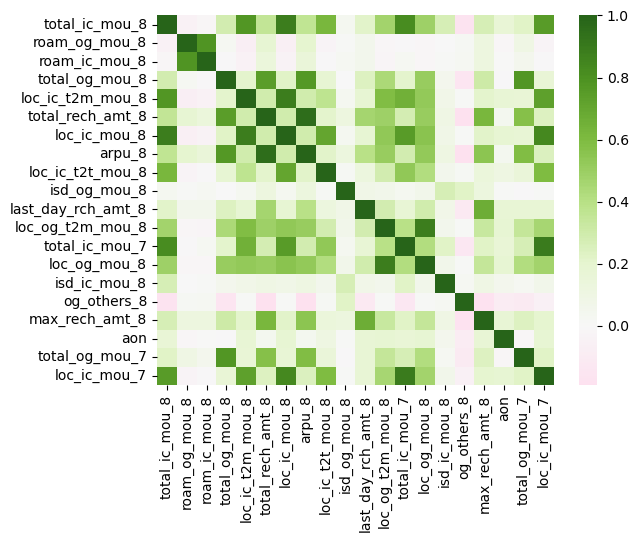

In [96]:
# plotting feature correlation
sns.heatmap(data=X_train_new[top_features].corr(), center=0.0, cmap='PiYG')

**Observation**
- These variables are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
- Below is the list of top 20 predictors as given by model
    - 1 -      loc_ic_t2t_mou_8
    - 2 -          loc_og_mou_8
    - 3 -         roam_og_mou_8
    - 4 -         roam_ic_mou_8
    - 5 -          loc_ic_mou_8
    - 6 -      loc_og_t2t_mou_8
    - 7 -        total_og_mou_8
    - 8 -      total_rech_amt_8
    - 9 -      loc_ic_t2m_mou_8
    - 10 -   last_day_rch_amt_8
    - 11 -               arpu_8
    - 12 -          onnet_mou_8
    - 13 -         std_ic_mou_8
    - 14 -         isd_ic_mou_8
    - 15 -       max_rech_amt_8
    - 16 -         spl_ic_mou_8
    - 17 -       total_ic_mou_7
    - 18 -     loc_og_t2m_mou_8
    - 19 -     loc_ic_t2t_mou_7

## Step 9: Business Recommendations to Manage Customer Churn

- The prediction can be used to take steps towards retaining customer paying high values incase there is any probability of them being churn.
- Maximum churn happens in first 6 months hence such customers should be focused.
- Customers with lower outgoing calls in 8th month are at higher risk of being churn. Hence such customers need to be given attention.
- Customers with low arpu(average revenue per user) should be focused as there is high possibility for them being churn 
- Company can give more discounts or some special offers or launch new schemes to retain customers at risk of being churn.
- roaming usage incoming and outgoing seems to be important predictors of churn. Company can think of lowering rates for roaming usage.
- local incoming calls within same operator is the most important predictor of being churn and company can make this service free to compete with other competitors and retain customers.
- Special packages can be rolled out for local outgoing calls which do not affect minutes of usage.
- Company can also think on revised rated of STD and ISD calls or special packages can be rolled out. 
- total recharge amount is also one of the good indicator of churn and company can provide discounts on recharge.

